## 임베딩을 활용한 분류

텍스트를 분류하는 방법에는 여러 가지가 있습니다. 이 노트북에서는 임베딩을 사용한 텍스트 분류의 예를 공유합니다. 많은 텍스트 분류 작업에서 임베딩보다 미세 조정된 모델이 더 나은 성과를 내는 것을 보았습니다. 분류를 위한 미세 조정 모델의 예는 [Fine-tuned_classification.ipynb](Fine-tuned_classification.ipynb)에서 참조하세요. 또한 차원을 임베딩하는 것보다 더 많은 예제가 있는 것이 좋지만 여기서는 그렇지 않습니다.

이 텍스트 분류 작업에서는 리뷰 텍스트의 임베딩을 기반으로 음식 리뷰의 점수(1~5점)를 예측합니다. 보이지 않는 데이터에 대한 성능을 현실적으로 평가할 수 있도록 다음 모든 작업을 위해 데이터 세트를 학습용과 테스트용으로 나눕니다. 데이터 세트는 [데이터 세트 가져오기 노트북](Obtain_dataset.ipynb)에 생성됩니다.

In [3]:
# imports
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# load data
datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(eval).apply(np.array)  # convert string to array

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Score, test_size=0.2, random_state=42
)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)


              precision    recall  f1-score   support

           1       0.88      0.35      0.50        20
           2       1.00      0.38      0.55         8
           3       1.00      0.18      0.31        11
           4       0.88      0.26      0.40        27
           5       0.75      1.00      0.86       134

    accuracy                           0.77       200
   macro avg       0.90      0.43      0.52       200
weighted avg       0.80      0.77      0.72       200



모델이 카테고리를 적절하게 구분하는 방법을 학습했음을 알 수 있습니다. 별점 5개 리뷰가 전반적으로 가장 좋은 성능을 보여주며, 데이터 세트에서 가장 일반적이기 때문에 이는 그리 놀라운 일이 아닙니다.

RandomForestClassifier() - Average precision score over all classes: 0.88


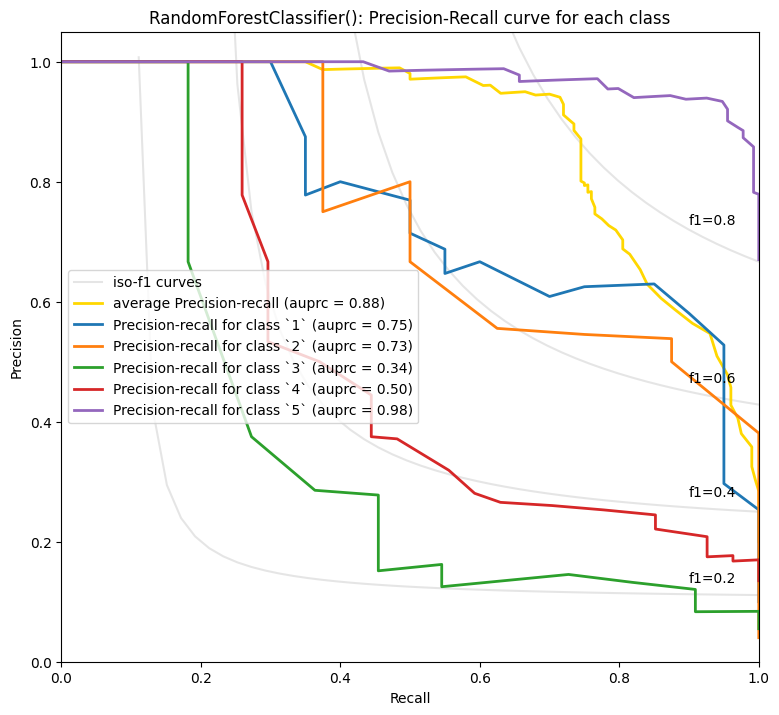

In [4]:
from openai.embeddings_utils import plot_multiclass_precision_recall

plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)


당연히 별점 5점과 별점 1점 리뷰가 더 예측하기 쉬운 것 같습니다. 더 많은 데이터가 있다면 별 2~4개 사이의 미묘한 차이를 더 잘 예측할 수 있겠지만, 사람들이 그 사이의 점수를 사용하는 방식에는 주관적인 요소가 더 많을 수도 있습니다.